In [7]:
import os
import torch
import torchvision
import torch.nn as nn
import numpy as np
import cv2
import glob
import torch.nn.functional as F
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from PIL import Image
import os

In [13]:
import baseline_model

In [14]:
print(torch.cuda.is_available())
device = torch.device("cuda")

True


In [ ]:
input_folder = 'FER2013'
output_folder = 'resized2_FER2013'

resize_images_in_folder(input_folder, output_folder)

In [5]:
dataset_path = "resized2_FER2013"
class_names = os.listdir(dataset_path+"/train")
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


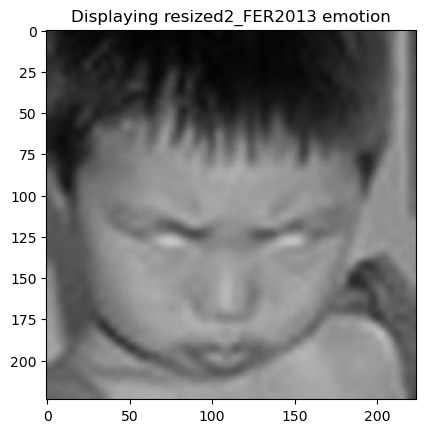

In [8]:
emotions = []
for file_name in glob.glob(dataset_path+'/train/*/*'):
    emotion = file_name.split('/')[-2]
    if emotion not in emotions:
        img = cv2.imread(file_name)
        plt.imshow(img)
        plt.title("Displaying {} emotion".format(emotion))
        plt.show()
    emotions.append(emotion)

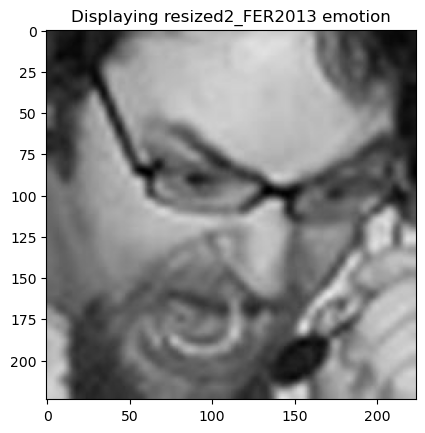

In [9]:
emotions = []
for file_name in glob.glob(dataset_path+'/test/*/*'):
    emotion = file_name.split('/')[-2]
    if emotion not in emotions:
        img = cv2.imread(file_name)
        plt.imshow(img)
        plt.title("Displaying {} emotion".format(emotion))
        plt.show()
    emotions.append(emotion)

In [10]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Resize((224, 224))])

In [11]:
train_dataset = ImageFolder(dataset_path+'/train',transform)
train_loader = DataLoader(dataset=train_dataset,batch_size=2048*6)
#creating val data loaders
val_dataset = ImageFolder(dataset_path+'/test',transform)
val_loader = DataLoader(dataset=val_dataset,batch_size=2048)

In [12]:
for batch in train_loader:
    print(batch[0].shape,batch[1].shape)
    break

torch.Size([12288, 3, 224, 224]) torch.Size([12288])


In [13]:
classes_mappings = train_dataset.class_to_idx
#reversing
reversed_mappings = {v:k for k,v in classes_mappings.items()}
print(reversed_mappings)

{0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Deep_Emotion().to(device)

optimizer = torch.optim.Adam(model.parameters(),lr=0.001)


In [46]:
# Define the number of samples, channels, height, and width for the test input
N, C, H, W = 2, 3, 4, 4  # Example dimensions

# Create random input data with the specified dimensions
input_data = np.random.randn(N, C, H, W)

# Define gamma and beta for the InstanceNorm layer, or leave them as None to be initialized randomly
gamma = np.ones(C)  # Scale parameter, usually initialized to ones
beta = np.zeros(C)  # Shift parameter, usually initialized to zeros

# Create an InstanceNorm layer with the specified number of channels
instance_norm_layer = InstanceNorm(num_channels=C, gamma=gamma, beta=beta)

# Normalize the input data using the forward method
normalized_data = instance_norm_layer.forward(input_data)

# Print the normalized data to see the results
print("Normalized Data:")
print(normalized_data)

# Verify that the mean and standard deviation for each channel of each image are close to 0 and 1, respectively
for n in range(N):
    for c in range(C):
        channel_mean = np.mean(normalized_data[n, c, :, :])
        channel_std = np.std(normalized_data[n, c, :, :])
        print(f"Image {n}, Channel {c} - Mean: {channel_mean}, Std: {channel_std}")


Normalized Data:
[[[[-0.03304634  0.99572285 -0.46549964  0.31430432]
   [ 2.53039734 -1.01645105 -0.48762656 -0.92002236]
   [-1.25256224 -0.17494823  0.84233742  1.62986409]
   [-0.13243598 -0.43663007 -0.81260138 -0.58080218]]

  [[ 0.18293691  0.16463109 -1.03936446 -1.37674452]
   [ 1.34496985  0.13003217  1.10704484  1.25000497]
   [-2.06270908 -0.65780404  0.02268041  0.94065252]
   [ 1.04815947  0.5805132  -0.76942202 -0.86558132]]

  [[-0.55093759 -0.57053649  0.5525679   0.61983295]
   [-0.28196162  0.3187454  -1.76918878  1.69717989]
   [ 1.36270192 -0.64897422 -2.16308043  0.58026431]
   [-0.3387552  -0.17695503  0.447215    0.921882  ]]]


 [[[-1.55246291 -1.26326972 -0.4499049  -0.60744619]
   [-0.52513118 -1.27710648  1.74242083  0.43517005]
   [ 1.80701693  0.11513723  0.2131422   0.52106796]
   [ 0.61303202  1.0852234   0.19369168 -1.05058091]]

  [[-1.1818201   0.51070769 -0.43078604  0.35008795]
   [ 0.35244576  0.72675313  0.31338158  0.33371429]
   [ 1.53447136 -0.

In [ ]:
num_epochs=20
history =fit(num_epochs, model, train_loader,val_loader,opt=optimizer)